In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 400
plt.rcParams["figure.figsize"] = (6, 3)
import numpy as np
location = '//ds.leeds.ac.uk/student/student49/cmsma/MnII_CoIII/AtomType_BondDist_AtomVal_Data.csv'
df = pd.read_csv(location)

In [2]:
# WARNING, I use valence and coordinating interchangerbly. 
# I realise halfway through this investigation that coordination is the correct term to use here. 
# Valence is wrong and should be replaced with coordination
df

,ccdc_refcode_molecule_index,metal_centre,adjacent_atom_type,bond_dist,adjacent_atom_valency
0,BAKMAF_0_1,Co,N,2.0046,4
1,BAKMAF_0_1,Co,N,2.0078,4
2,BAKMAF_0_1,Co,N,1.9336,4
3,BAKMAF_0_1,Co,N,1.9513,4
4,BAKMAF_0_1,Co,N,1.9462,4
...,...,...,...,...,...
31706,ZAXDEL_0_2,Mn,N,2.2688,4
31707,ZAXDEL_0_2,Mn,N,2.3104,4
31708,ZAXDEL_0_2,Mn,N,2.2766,4
31709,ZAXDEL_0_2,Mn,N,2.3425,4


In [3]:
# Analysis of Coordination number of metal centre
df['ccdc_refcode_molecule_index'].value_counts().head(20)
# BAQWUL_0 is not right, lots of atoms with impossible amount of valencies, looks like the spaceship in thunderbirds
# Similuar story with KAHKOT_1 and 2
# GEVBOY is an unusal structure, but does contain divalent hydrogens bonded to two carbons in a 
# cyclic triangle
# VEBZOS contains impossible valencies
# AHOYII contains impossibel valencies
# LIZMEP contains potentially possible valencies, 12 waters around a base metal centre??
# RITQAO contains impossibel valencies
# YAKBER is some werid zeolite like structure
# LUPYON contains impossibel valencies

# I think the important take away from this is to compare the number of 
# 4 coordinate vs 5 coordinate vs 6 coordinate
# Too many of these down bad structures to think about


BAQWUL_0_1      22
KAHKOT_14_4     16
KAHKOT_46_4     15
LIZMEP_0_1      12
YAKBER_0_0      12
LUPYON_0_1      12
AHOYII_0_2      12
RITQAO_0_3      12
VEBZOS_43_3     12
VEBZOS_0_3      12
GEVBOY_0_0      12
NAYRAH_1_0      10
LUHKAA_0_2      10
LUHKAA_0_1      10
JAKTIZ_2_0      10
ORINAF_0_4      10
JAKTIZ_1_0      10
NAYRAH_0_0      10
KUFHIE_0_2       9
KUFHIE_124_2     9
Name: ccdc_refcode_molecule_index, dtype: int64

In [4]:
Co_df = df[df["metal_centre"] == "Co"]
Mn_df = df[df["metal_centre"] == "Mn"]
Co_df_coordination_number_list = Co_df["ccdc_refcode_molecule_index"].value_counts()
Mn_df_coordination_number_list = Mn_df["ccdc_refcode_molecule_index"].value_counts()

In [5]:
Mn_df['bond_dist'].mean()

2.2048513076490437

In [6]:
Mn_df['bond_dist'].std()*3

0.4954558256712163

In [7]:
# Find mode of coodination numbers
Co_coordination_mode_list = [0 for _ in range(0, Co_df_coordination_number_list.max())]
Mn_coordination_mode_list = [0 for _ in range(0, Mn_df_coordination_number_list.max())]
for Co_coordination_number in Co_df_coordination_number_list:
    Co_coordination_mode_list[Co_coordination_number-1] = Co_coordination_mode_list[Co_coordination_number-1] + 1
for Mn_coordination_number in Mn_df_coordination_number_list:
    Mn_coordination_mode_list[Mn_coordination_number-1] = Mn_coordination_mode_list[Mn_coordination_number-1] + 1

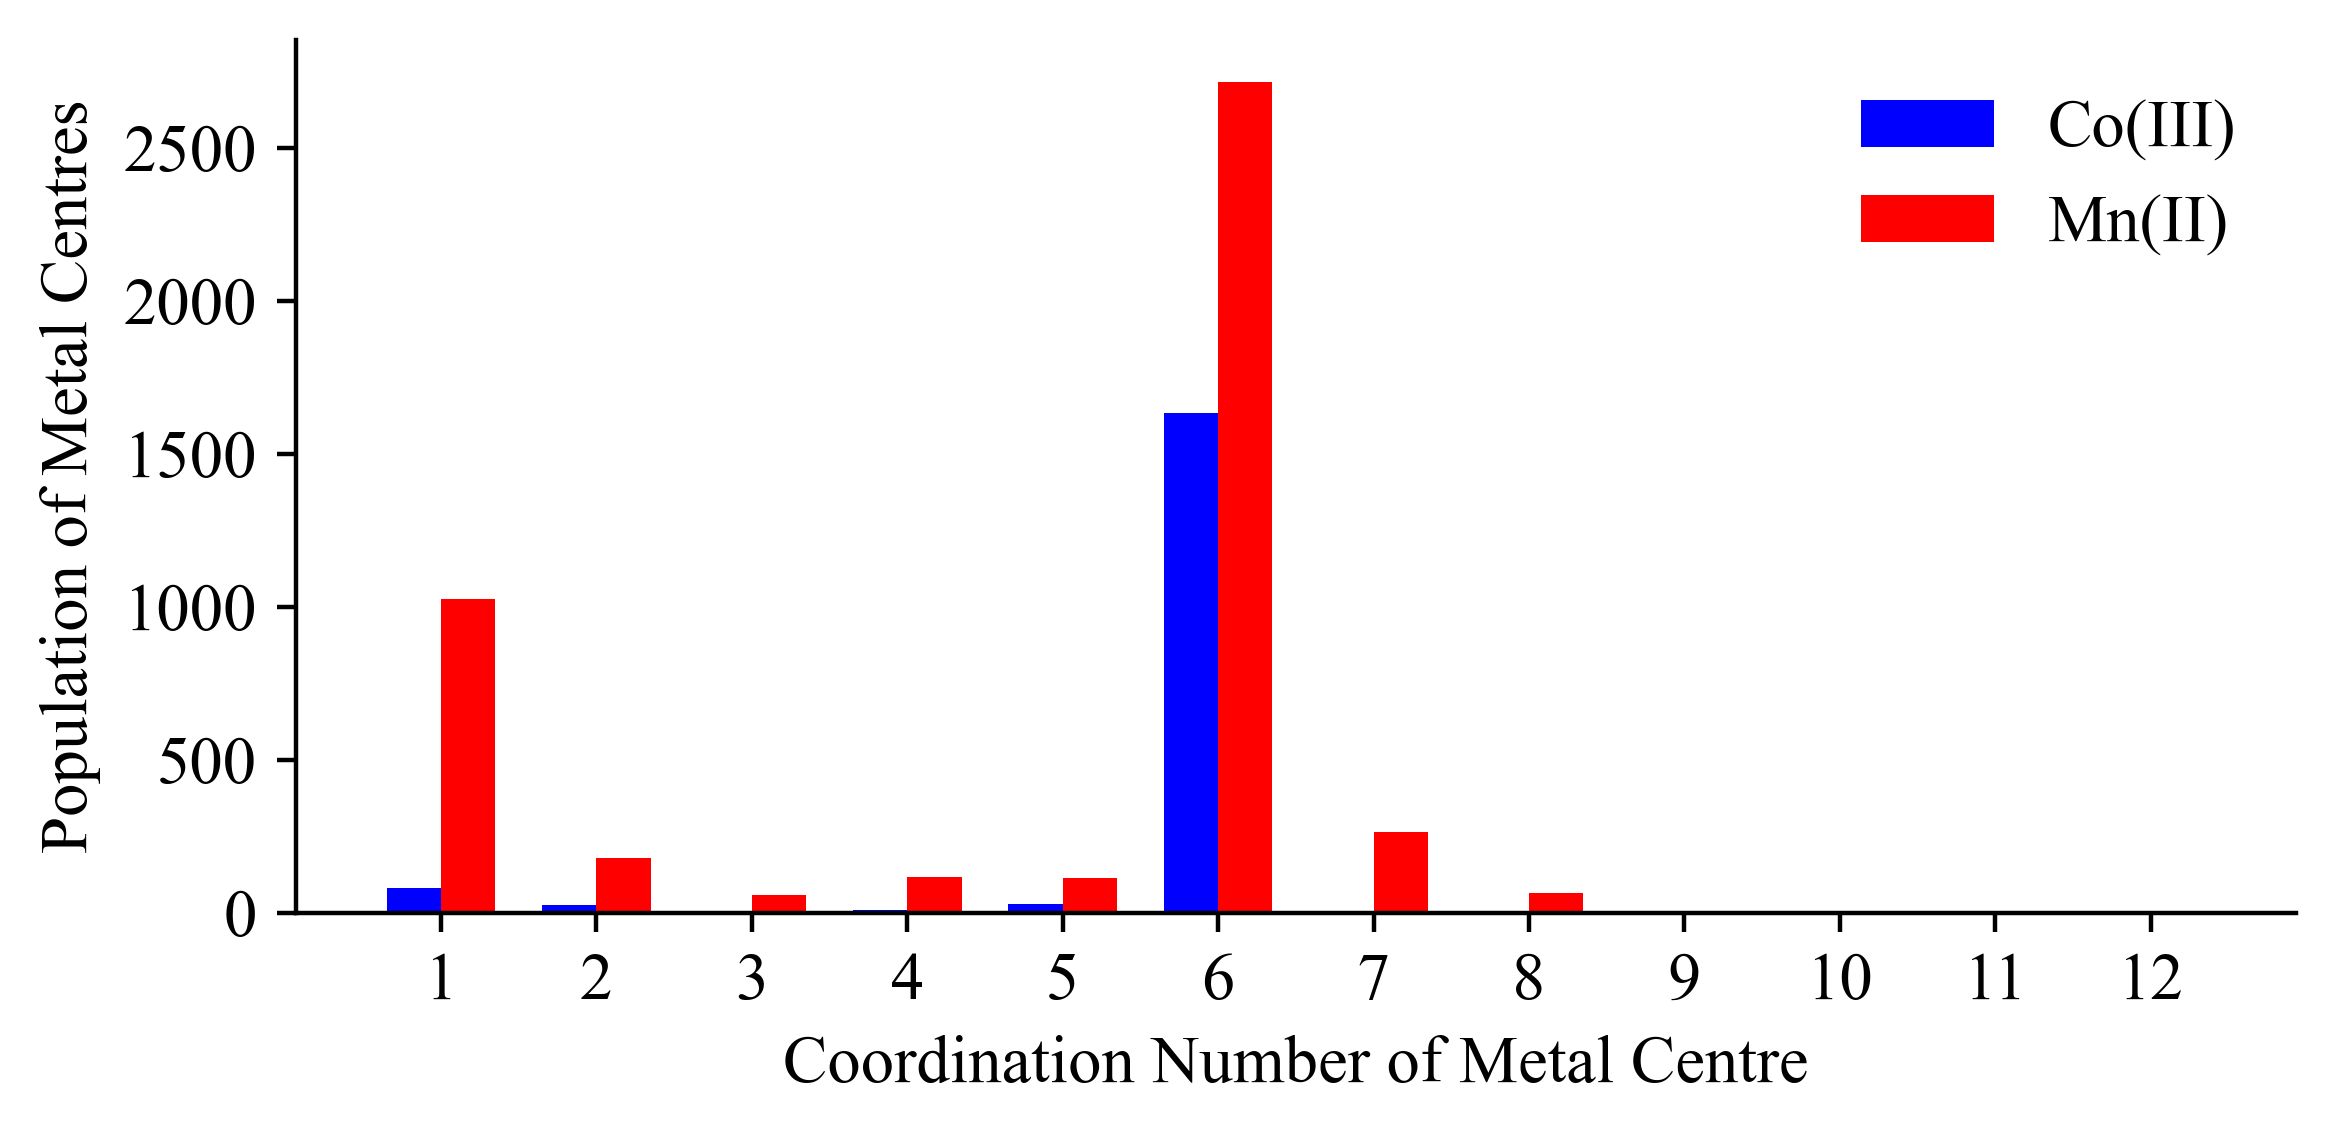

In [8]:
length_of_list = 12
Co_coordination_mode_list = list(Co_coordination_mode_list[0:length_of_list])
Mn_coordination_mode_list = list(Mn_coordination_mode_list[0:length_of_list])
labels = [str(i+1) for i in range(length_of_list)]
x = [float(i) for i in range(len(labels))]
width = 0.35
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in x], Co_coordination_mode_list, width, color='b', label='Co(III)')
ax.bar([i+width/2 for i in x], Mn_coordination_mode_list, width, color='r', label='Mn(II)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Coordination Number of Metal Centre')
ax.set_ylabel('Population of Metal Centres')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/FFPR/actural_pop.png", dpi=400)
plt.show()

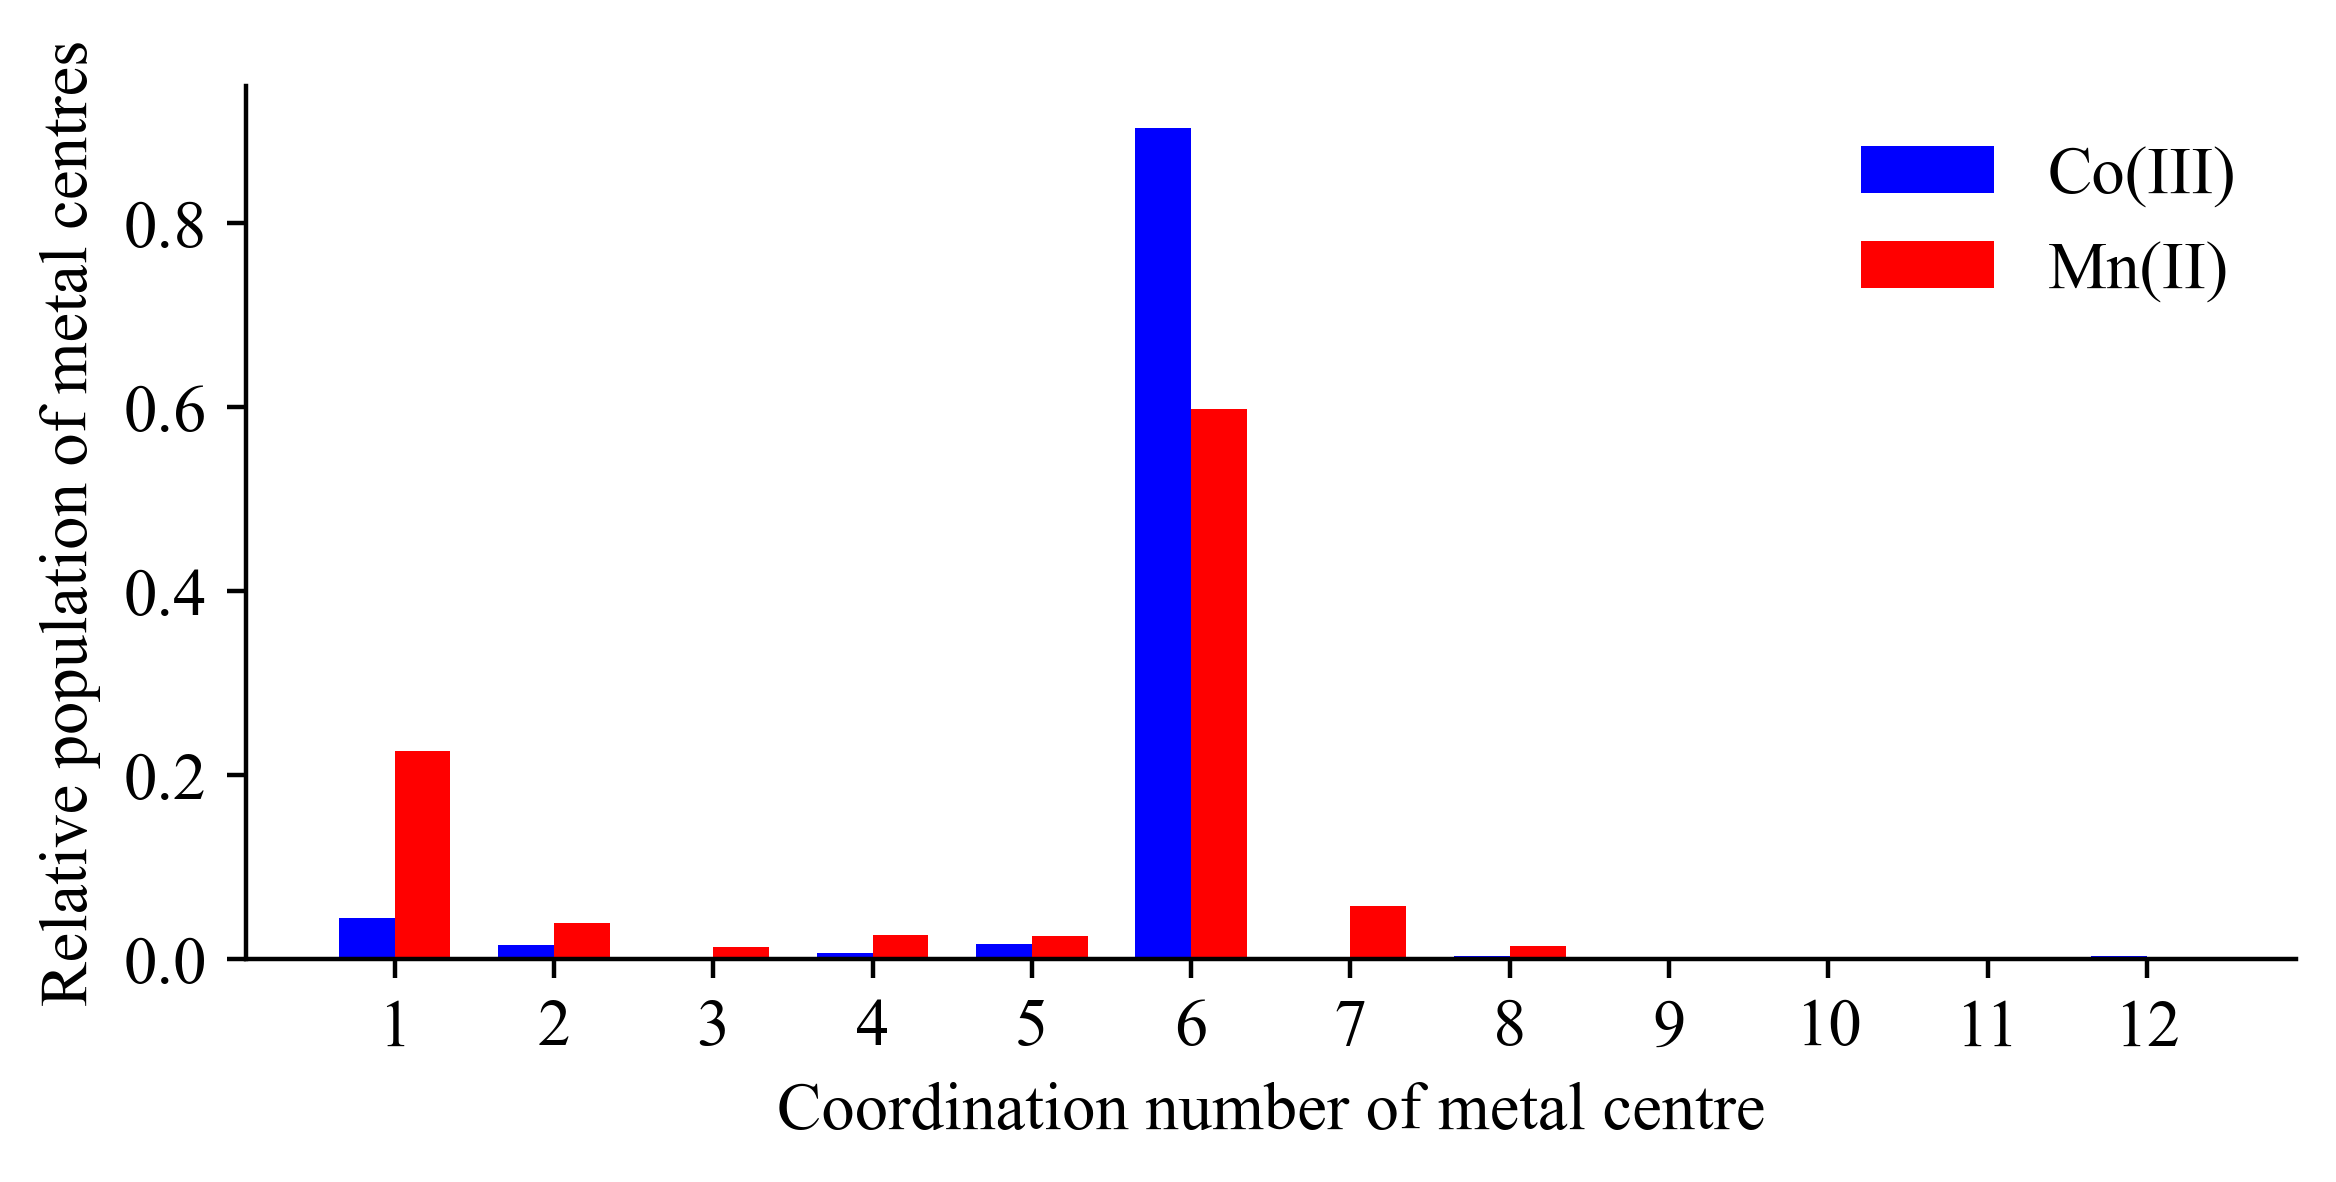

In [9]:
#Relative populations too max population of coordination number
Co_coordination_mode_list = [i/sum(Co_coordination_mode_list) for i in Co_coordination_mode_list]
Mn_coordination_mode_list = [i/sum(Mn_coordination_mode_list) for i in Mn_coordination_mode_list]
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in x], Co_coordination_mode_list, width, color='b', label='Co(III)')
ax.bar([i+width/2 for i in x], Mn_coordination_mode_list, width, color='r', label='Mn(II)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Coordination number of metal centre')
ax.set_ylabel('Relative population of metal centres')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/FFPR/RelPop_coordination.png", dpi=400)
plt.show()

In [10]:
# It is clear in the two graphs above that 6 coordinate complexes are by far the most commom. 
# So I think it is worth only looking at 6 coordinate complexes and then maybe 4 coordinate complexes 
# because it seems that Mn(II) 4 coordinate complexes are more likely then 
# four coodinate Co(III) complexes
# Side note, after checking in mercurey, supposed one coordinate complexes usally indicate 
# that the metal is part of a wider crystal via bonds/not interactions. 
# I dont think that 6 coordinate compounds are being missed out because these 
# one coordinate compounds are usally part of the repeating unit. 
# However the valency might potentially be missed out from the coordinating compounds 
# as they may be part of the repeating unit.

#lets only count in the 6 coordinate compounds
coordination_list = df['ccdc_refcode_molecule_index'].value_counts()
coordination_index = coordination_list.index

Co_coordination_list = Co_df['ccdc_refcode_molecule_index'].value_counts()
Co_6_coordination_index_list = Co_coordination_list.loc[lambda x : x == 6].index
Co_6_df = Co_df[Co_df['ccdc_refcode_molecule_index'].isin(Co_6_coordination_index_list)]
Mn_coordination_list = Mn_df['ccdc_refcode_molecule_index'].value_counts()
Mn_6_coordination_index_list = Mn_coordination_list.loc[lambda x : x == 6].index
Mn_6_df = Mn_df[Mn_df['ccdc_refcode_molecule_index'].isin(Mn_6_coordination_index_list)]

In [11]:
# Analysis of Bond Distance of metal centre and its adjacent atoms
# What are all the elements that Co(III) and Mn(II) are bonded too
# From the graph below, Mn(II) is far more oxophilic than Co(III)
Co_adjacent_atom_types = Co_6_df['adjacent_atom_type'].value_counts()
Mn_adjacent_atom_types = Mn_6_df['adjacent_atom_type'].value_counts()
elements = ['C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Se', 'Br', 'I']
Co_adjacent_atom_types = Co_adjacent_atom_types.filter(items = elements)
Mn_adjacent_atom_types = Mn_adjacent_atom_types.filter(items = elements)
print(Mn_adjacent_atom_types)
'''
x = [i for i in range(len(elements))]
width = 0.35
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in x], Co_adjacent_atom_types, width, color='b', label='Co(III)')
ax.bar([i+width/2 for i in x], Mn_adjacent_atom_types, width, color='r', label='Mn(II)')
ax.set_xticks(x)
ax.set_xticklabels(elements)
ax.set_xlabel('Element')
ax.set_ylabel('Number of metal centre to element bonds')
ax.legend()
plt.show()
'''

C       83
N     8662
O     7000
F        8
P        2
S      167
Cl     329
Se      13
Br       5
Name: adjacent_atom_type, dtype: int64


"\nx = [i for i in range(len(elements))]\nwidth = 0.35\nfig, ax = plt.subplots()\nax.bar([i-width/2 for i in x], Co_adjacent_atom_types, width, color='b', label='Co(III)')\nax.bar([i+width/2 for i in x], Mn_adjacent_atom_types, width, color='r', label='Mn(II)')\nax.set_xticks(x)\nax.set_xticklabels(elements)\nax.set_xlabel('Element')\nax.set_ylabel('Number of metal centre to element bonds')\nax.legend()\nplt.show()\n"

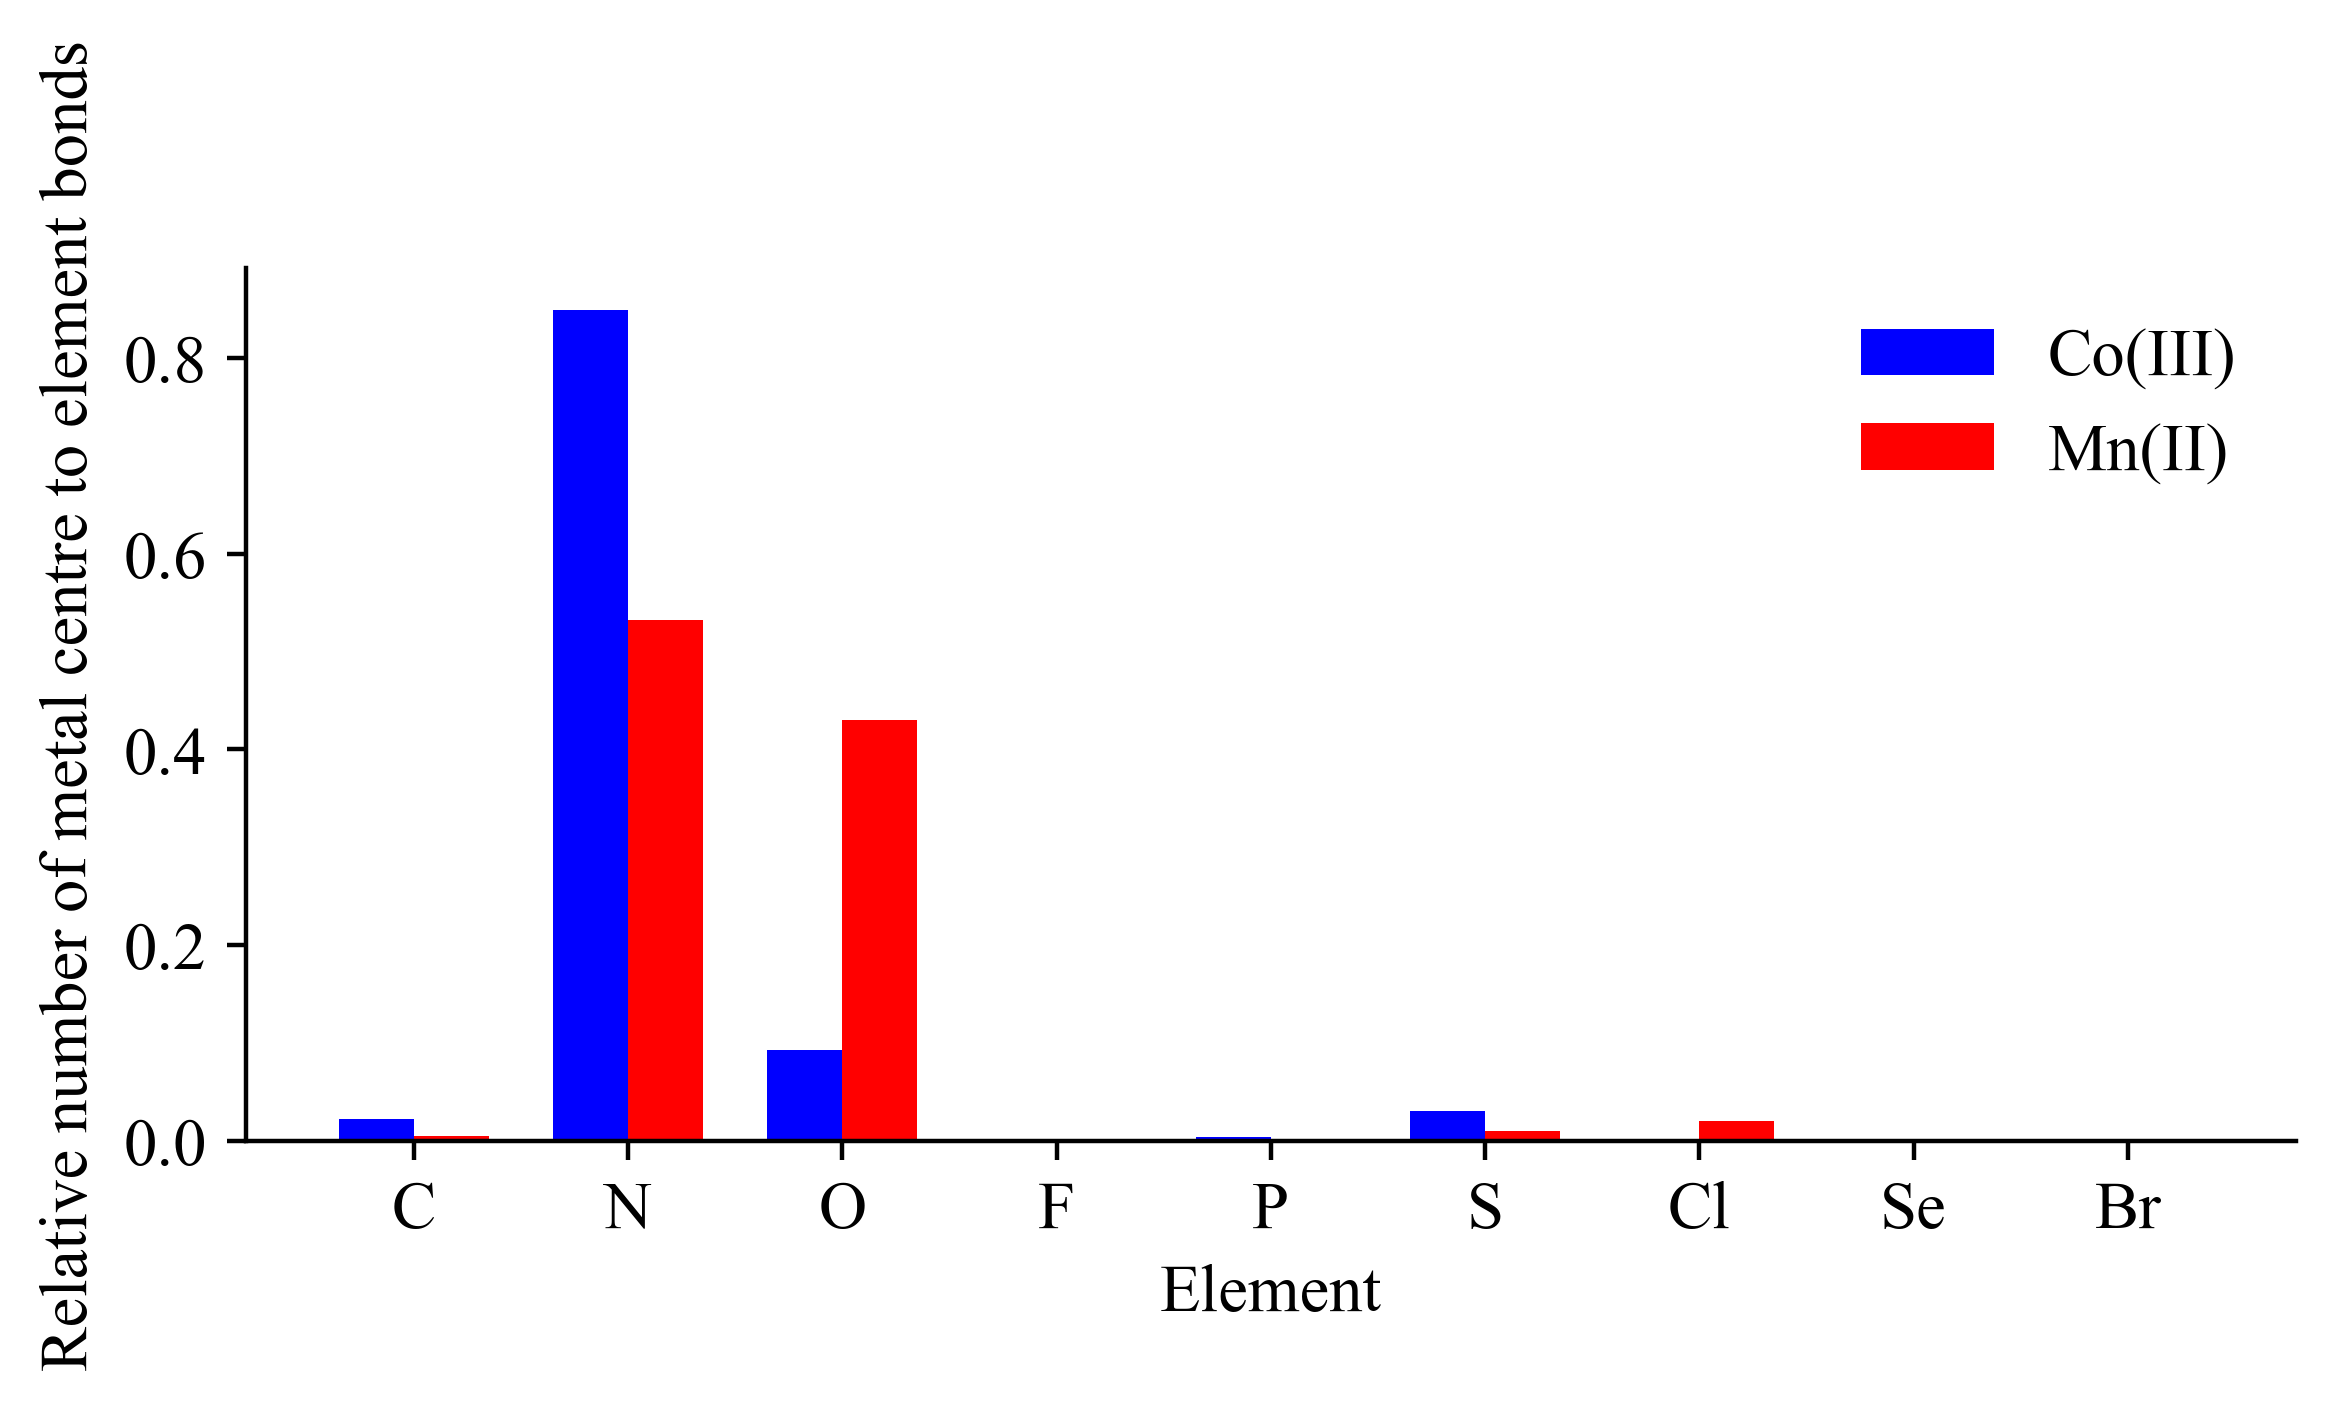

In [12]:
# I think its important to look at the 'per capita' values so divide all values by the sum of total bonds
# Mn(II) is still has far more oxygen bonds
# Co(III) looks to have more nitrogen bonds
elements = ['C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Se', 'Br']
Co_adjacent_atom_types = Co_adjacent_atom_types.filter(items = elements)
Co_adjacent_atom_types = Co_adjacent_atom_types.rename('Co_adjacent_atom_types')
Mn_adjacent_atom_types = Mn_adjacent_atom_types.filter(items = elements)
Mn_adjacent_atom_types = Mn_adjacent_atom_types.rename('Mn_adjacent_atom_types')
# the df_10 part is important as we can include all atom types, because both series don't have all atom types specified in the elements list
df_10 = pd.concat([Co_adjacent_atom_types.to_frame(), Mn_adjacent_atom_types.to_frame()], axis=1)
df_10 = df_10.loc[elements]
df_10 = df_10.fillna(0)
Co_adjacent_atom_types = pd.Series(df_10['Co_adjacent_atom_types'])
Mn_adjacent_atom_types = pd.Series(df_10['Mn_adjacent_atom_types'])
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in range(len(Co_adjacent_atom_types))], [i/sum(Co_adjacent_atom_types) for i in Co_adjacent_atom_types], width, color='b', label='Co(III)')
ax.bar([i+width/2 for i in range(len(Mn_adjacent_atom_types))], [i/sum(Mn_adjacent_atom_types) for i in Mn_adjacent_atom_types], width, color='r', label='Mn(II)')
ax.set_xticks(range(len(elements)))
ax.set_xticklabels(elements)
ax.set_xlabel('Element')
ax.set_ylabel('Relative number of metal centre to element bonds')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/FFPR/RelPop_elemtent_metal_bond.png", dpi=400)
plt.show()

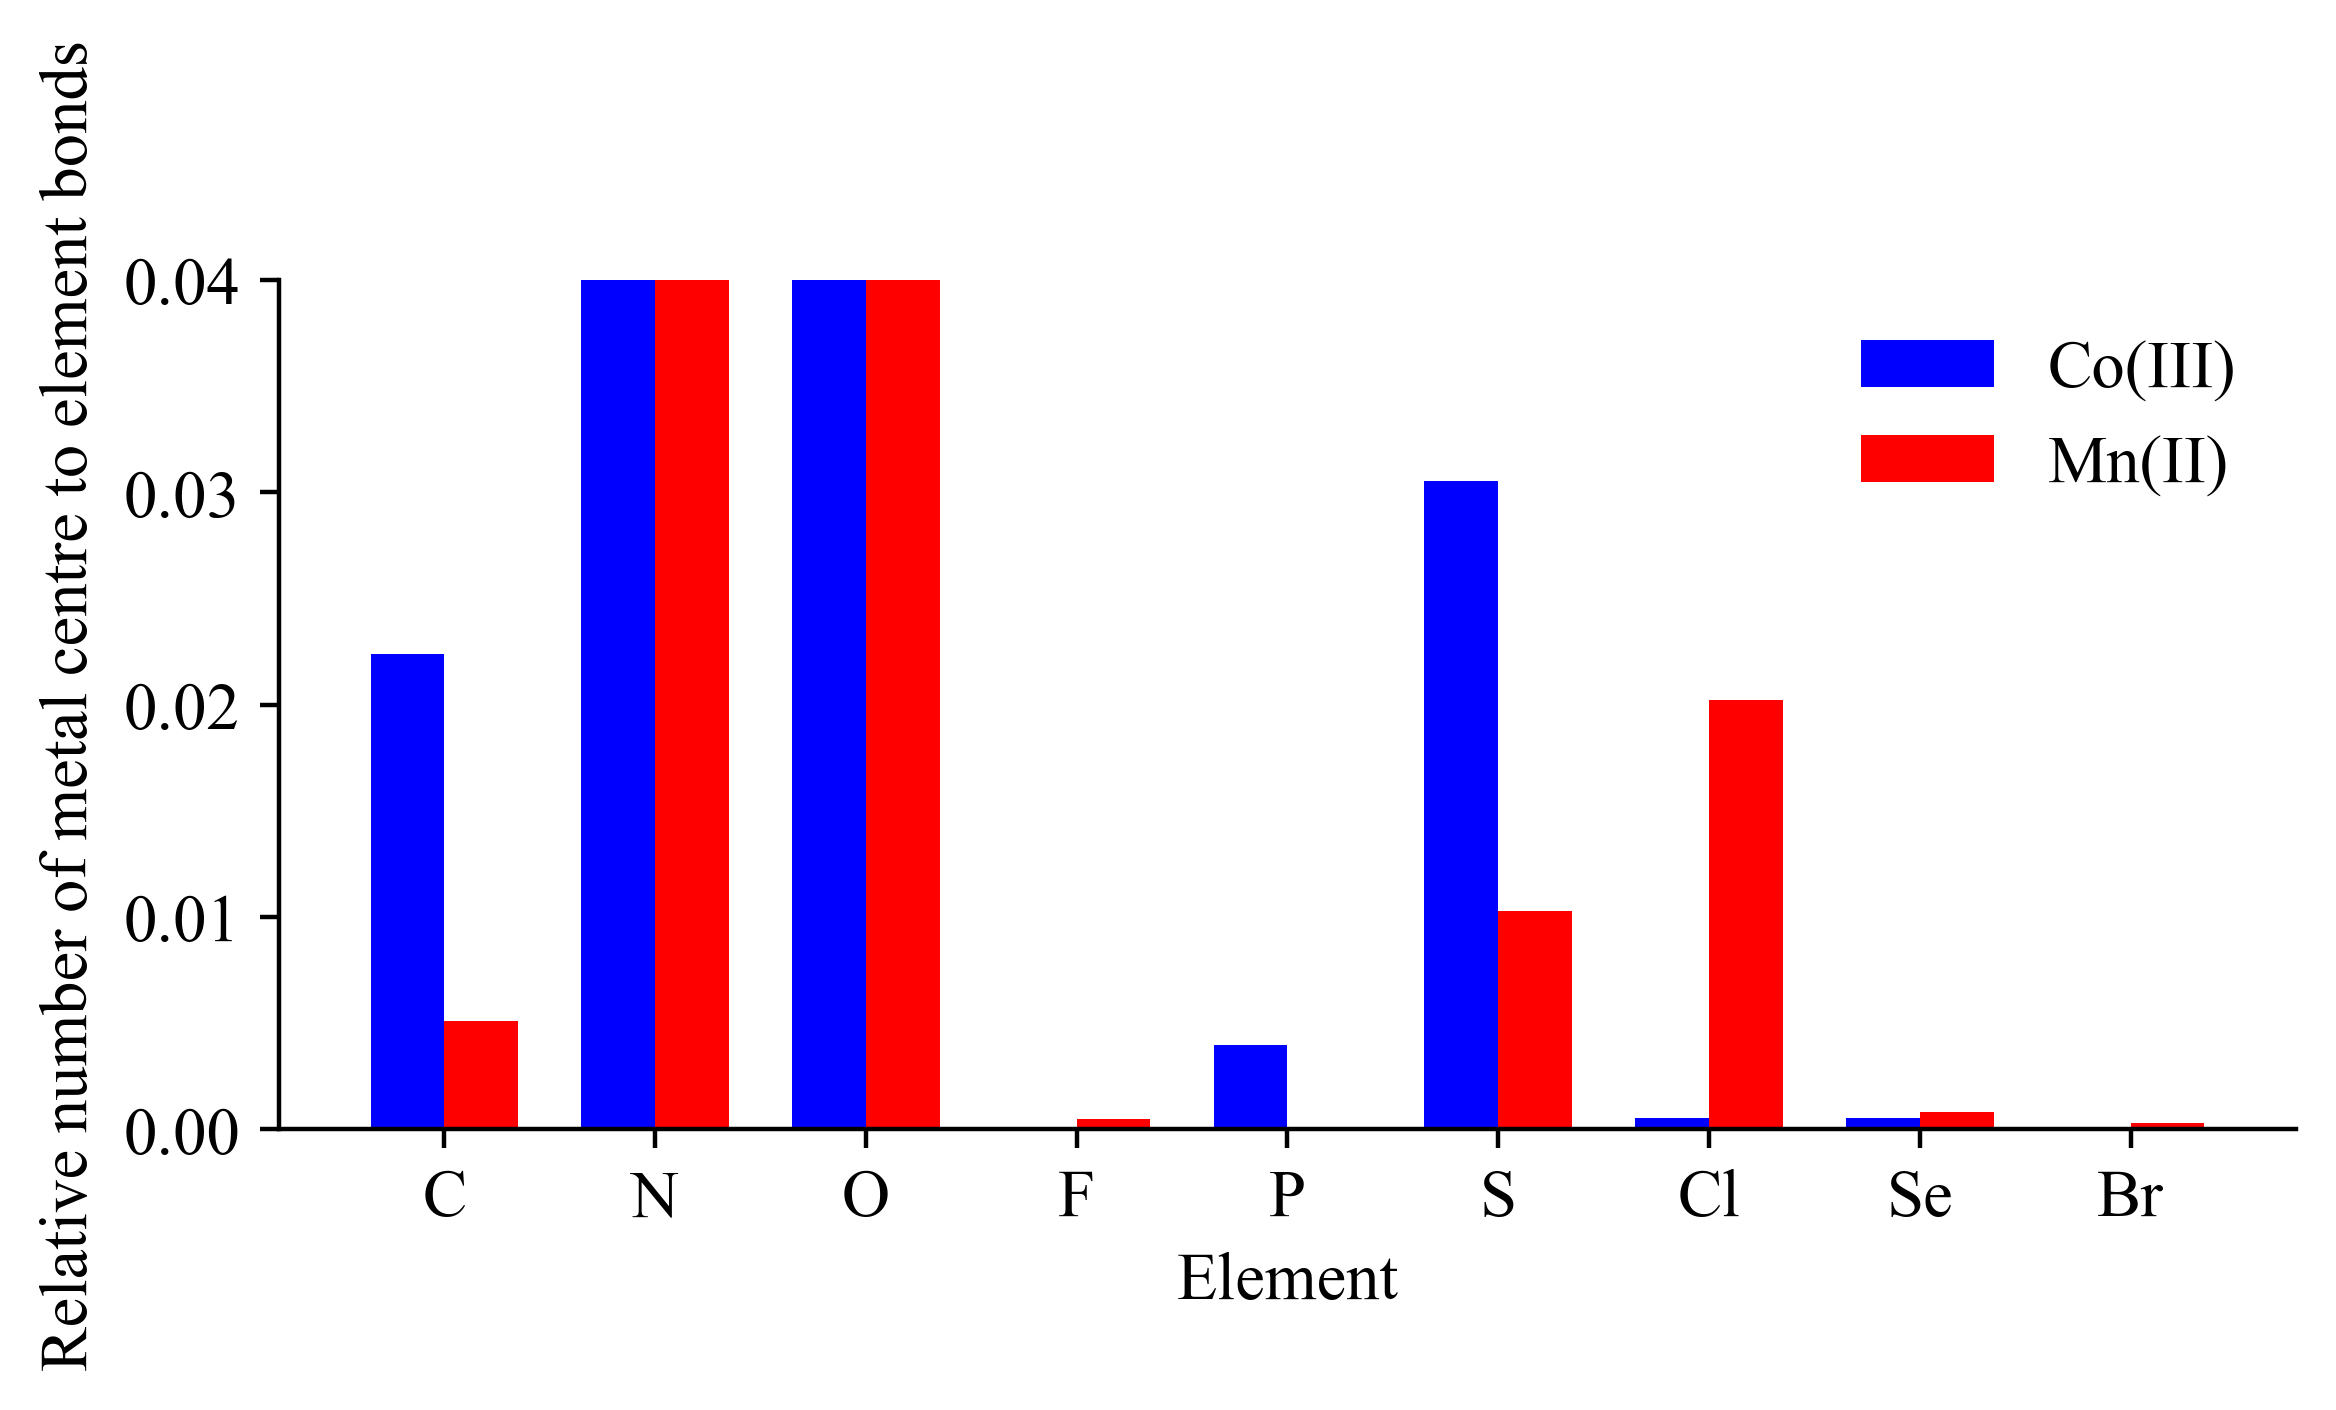

In [13]:
#fig is blown up to show the other elements bars
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in range(len(Co_adjacent_atom_types))], [i/sum(Co_adjacent_atom_types) for i in Co_adjacent_atom_types], width, color='b', label='Co(III)')
ax.bar([i+width/2 for i in range(len(Mn_adjacent_atom_types))], [i/sum(Mn_adjacent_atom_types) for i in Mn_adjacent_atom_types], width, color='r', label='Mn(II)')
ax.set_xticks(range(len(elements)))
ax.set_xticklabels(elements)
ax.set_xlabel('Element')
ax.set_ylabel('Relative number of metal centre to element bonds')
ax.legend(frameon=False)
ax.set_ylim(0, 0.04)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/FFPR/RelPop_Element_metal_zoomed.png", dpi=400)
plt.show()

In [14]:
# Is there a difference in the valency of the nitrogen that bonds to Mn(II) compared to Co(III)
# What is the valency of the oxygens bonded to the metal centres
# In this context valency means how many elements the N/O is bonded too. 
# Don't know the word to use otherwise
Co_6_Nitrogens_only = Co_6_df[Co_6_df['adjacent_atom_type'] == 'N']
Mn_6_Nitrogens_only = Mn_6_df[Mn_6_df['adjacent_atom_type'] == 'N']
Co_6_N_valency_count = Co_6_Nitrogens_only['adjacent_atom_valency'].value_counts()
Mn_6_N_valency_count = Mn_6_Nitrogens_only['adjacent_atom_valency'].value_counts()
Mn_6_N_valency_count

3    5010
4    1675
2    1115
1     856
5       6
Name: adjacent_atom_valency, dtype: int64

In [15]:
Co_6_N_valency_count

4    4958
3    2690
2     432
1     217
5       6
7       4
6       1
Name: adjacent_atom_valency, dtype: int64

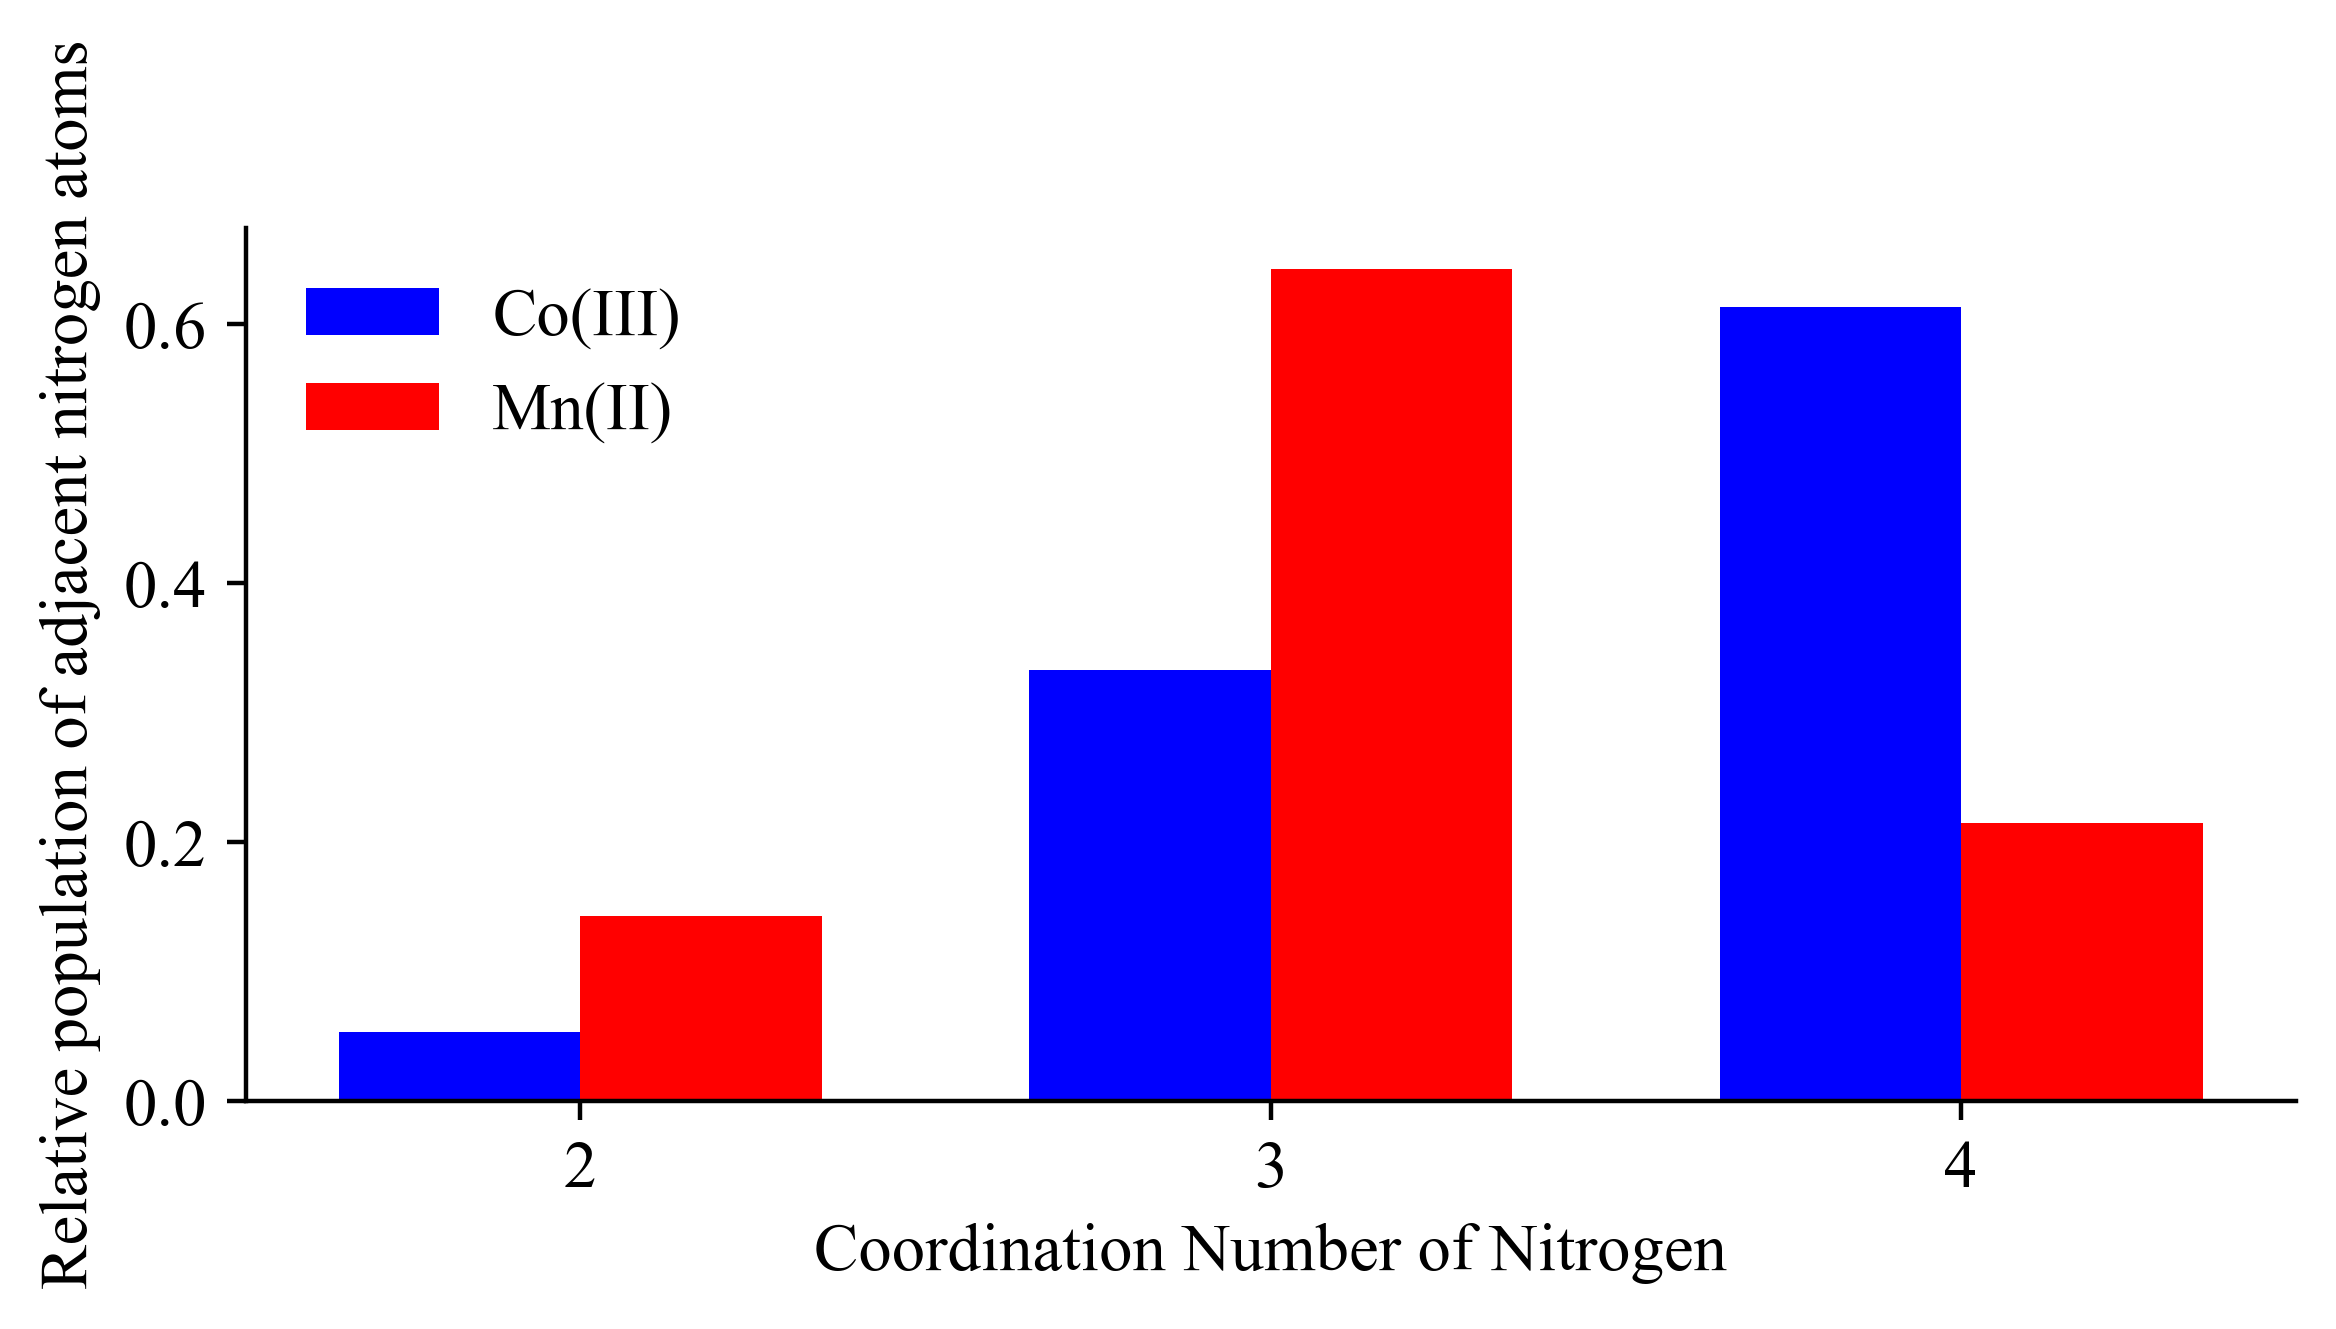

In [16]:
v_num_Mn = []
v_num_Co = []
valency = []
x = []
for v in range(2, 5):
    v_num_Mn.append(Mn_6_N_valency_count[v])
    v_num_Co.append(Co_6_N_valency_count[v])
    valency.append(str(v))
    x.append(v)
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in x], [i/sum(v_num_Co) for i in v_num_Co], width, color='b', label='Co(III)')
ax.bar([i+width/2 for i in x], [i/sum(v_num_Mn) for i in v_num_Mn], width, color='r', label='Mn(II)')
ax.set_xticks(x)
ax.set_xticklabels(valency)
ax.set_xlabel('Coordination Number of Nitrogen')
ax.set_ylabel('Relative population of adjacent nitrogen atoms')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [17]:
Co_6_Oxygens_only = Co_6_df[Co_6_df['adjacent_atom_type'] == 'O']
Mn_6_Oxygens_only = Mn_6_df[Mn_6_df['adjacent_atom_type'] == 'O']
Co_6_O_valency_count = Co_6_Oxygens_only['adjacent_atom_valency'].value_counts()
Mn_6_O_valency_count = Mn_6_Oxygens_only['adjacent_atom_valency'].value_counts()
Mn_6_O_valency_count

3    3263
2    2411
1     876
4     432
5      18
Name: adjacent_atom_valency, dtype: int64

In [18]:
Co_6_O_valency_count

2    428
3    296
1    158
4     28
5      1
Name: adjacent_atom_valency, dtype: int64

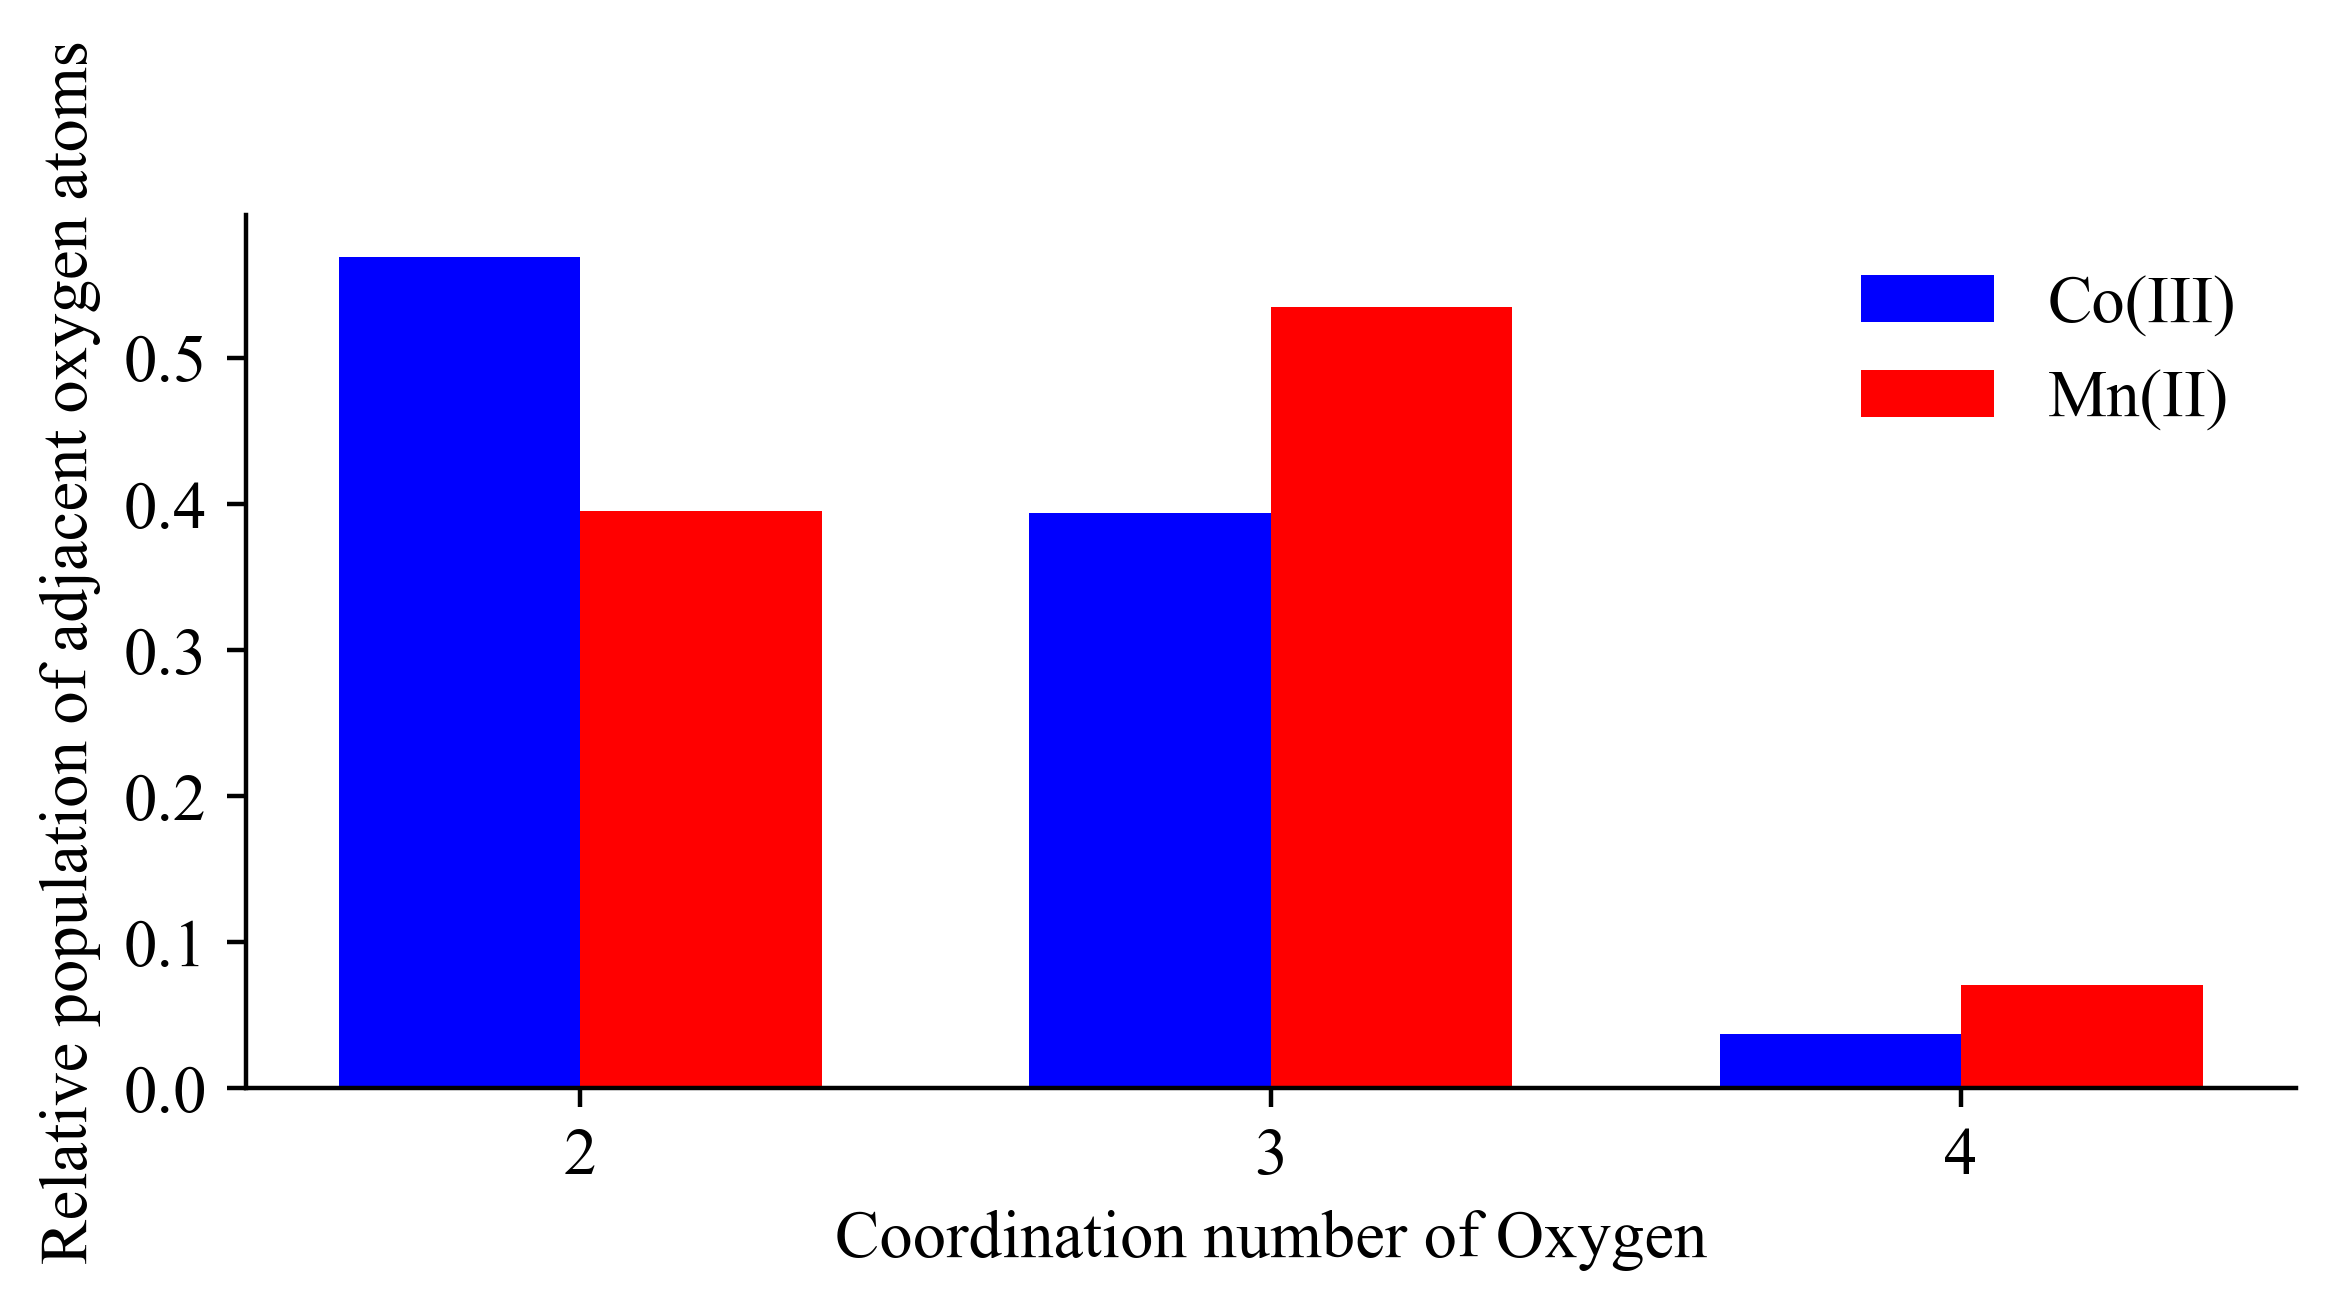

In [19]:
v_num_Mn = []
v_num_Co = []
valency = []
x = []
for v in range(2, 5):
    v_num_Mn.append(Mn_6_O_valency_count[v])
    v_num_Co.append(Co_6_O_valency_count[v])
    valency.append(str(v))
    x.append(v)
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in x], [i/sum(v_num_Co) for i in v_num_Co], width, color='b', label='Co(III)')
ax.bar([i+width/2 for i in x], [i/sum(v_num_Mn) for i in v_num_Mn], width, color='r', label='Mn(II)')
ax.set_xticks(x)
ax.set_xticklabels(valency)
ax.set_xlabel('Coordination number of Oxygen')
ax.set_ylabel('Relative population of adjacent oxygen atoms')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [20]:
# My next question based on this data is wherever the Mn(II) bonded to primarily 3 coordinate oxygens is water and 
# Co(III) bonded to 4 coordinate nitrogen is ammonia. 
# Or its not ammonia or water and actual organic ligands containing nitrogen and water
# is_it_water_ammonia.py will work this out for us
# Will need to pull list of 6 coordinate ligands and then use ccdc's api to scrape more data
# Will ask initial question if metal centre is attached to water/ammonia or organic ligand?

coor_6_list = list(Mn_6_coordination_index_list) + list(Co_6_coordination_index_list)
Mn_6_coordination_index_list
location = '//ds.leeds.ac.uk/student/student49/cmsma/MnII_CoIII/'
with open(location+'six_coordinate_ccdc_refcodes.csv', 'w') as f:
    for item in coor_6_list:
        f.write(item+'\n')
    f.close()

# Also in is_it_water_ammonia.py I will spot check 100 compounds to check that all oxidation state are Mn(II) and Co(III). 
# Spot check file is called random_check_of_6_coor.txt

In [21]:
df2 = pd.read_csv('//ds.leeds.ac.uk/student/student49/cmsma/MnII_CoIII/is_it_water_ammonia.csv')
df2

,ccdc_metal_centre_index,metal_centre,adjacent_atom_type,is_it_water,is_it_ammonia,is_it_organic_O,is_it_organic_N
0,GAYXUZ_0_0,Mn,O,0,0,1,0
1,GAYXUZ_0_0,Mn,O,0,0,1,0
2,GAYXUZ_0_0,Mn,O,0,0,1,0
3,GAYXUZ_0_0,Mn,O,0,0,1,0
4,GAYXUZ_0_0,Mn,O,0,0,1,0
...,...,...,...,...,...,...,...
26089,MAZCOD_0_0,Co,N,0,0,0,1
26090,MAZCOD_0_0,Co,O,0,0,0,0
26091,MAZCOD_0_0,Co,N,0,0,0,1
26092,MAZCOD_0_0,Co,N,0,0,0,1


In [22]:
Mn_df2 = df2[df2['metal_centre'] == 'Mn']
Co_df2 = df2[df2['metal_centre'] == 'Co']
All_Mn_coor_sites = Mn_df2.shape[0]
All_Co_coor_sites = Co_df2.shape[0]
All_Mn_H2O = Mn_df2['is_it_water'].sum()
All_Mn_orgO = Mn_df2['is_it_organic_O'].sum()
All_Mn_NH3 = Mn_df2['is_it_ammonia'].sum()
All_Mn_orgN = Mn_df2['is_it_organic_N'].sum()
All_Co_H20 = Co_df2['is_it_water'].sum()
All_Co_orgO = Co_df2['is_it_organic_O'].sum()
All_Co_NH3 = Co_df2['is_it_ammonia'].sum()
All_Co_orgN = Co_df2['is_it_organic_N'].sum()

In [23]:
All_Mn_H2O/All_Mn_coor_sites

0.13647520864015708

In [24]:
All_Co_H20/All_Co_coor_sites

0.009695856297203511

In [25]:
All_Mn_orgO/All_Mn_coor_sites

0.1130338733431517

In [26]:
All_Co_orgO/All_Co_coor_sites

0.04041641151255358

In [27]:
All_Mn_NH3/All_Mn_coor_sites

0.000429553264604811

In [28]:
All_Co_NH3/All_Co_coor_sites

0.10665441926923862

In [29]:
All_Mn_orgN/All_Mn_coor_sites

0.45446735395189003

In [30]:
All_Co_orgN/All_Co_coor_sites

0.7129005919575424

In [31]:
# This is interesting, water is attached to 14% of 6 coor Mn(II) sites but only 1% of 6 coor Co(III) sites
# Ammonia is attached to 11% of 6 coor Co(III) but 0.04% of Mn(II) sites.
# Organic O is attached to 11% of Mn(II) 6 coor sites but 4% of Co(III) 6 coor sites
# Organic N is attached to 45% of Mn(II) 6 coor sites and 71% of Co(III) 6 coor sites
# Lets observe the % of N/O atoms are NH3/H2O
All_Mn_O = Mn_df2[Mn_df2['adjacent_atom_type'] == 'O']
All_Mn_N = Mn_df2[Mn_df2['adjacent_atom_type'] == 'N']
All_Co_O = Co_df2[Co_df2['adjacent_atom_type'] == 'O']
All_Co_N = Co_df2[Co_df2['adjacent_atom_type'] == 'N']

In [32]:
All_Mn_H2O / All_Mn_O.shape[0]

0.3177142857142857

In [33]:
All_Mn_NH3 / All_Mn_N.shape[0]

0.0008081274532440544

In [34]:
All_Mn_orgO / All_Mn_O.shape[0]

0.2631428571428571

In [35]:
All_Mn_orgN / All_Mn_N.shape[0]

0.8549988455322096

In [36]:
All_Co_H20 / All_Co_O.shape[0]

0.10428100987925357

In [37]:
All_Co_NH3 / All_Co_N.shape[0]

0.1257823784304285

In [38]:
All_Co_orgO / All_Co_O.shape[0]

0.43468715697036225

In [39]:
All_Co_orgN / All_Co_N.shape[0]

0.8407558979297063

In [40]:
1 - (All_Mn_H2O+All_Mn_orgO)/All_Mn_O.shape[0]

0.41914285714285715

In [41]:
1 - (All_Mn_NH3+All_Mn_orgN)/All_Mn_N.shape[0]

0.14419302701454628

In [42]:
1 - (All_Co_H20+All_Co_orgO)/All_Co_O.shape[0]

0.4610318331503842

In [43]:
1 - (All_Co_NH3+All_Co_orgN)/All_Co_N.shape[0]

0.033461723639865215

In [44]:
# Water is 32% of all Mn-O sites, ammonia is 0.08% of all Mn-N sites.
# Water is 10% of all Co-O sites, ammonia is 13% of all Co-N sites
# Organic O is 26% of all Mn-O sites, Organic N is 85% of all Mn-N sites
# Organic O is 43% of all Co-O sites, Organic N is 84% of all Co-N sites
# This leaves 42 % of O of Mn-O to be potentially inorganic
# This leaves 14% of N of Mn-N to be potentially inorganic
# This leaves 46 % of O of Co-O to be potentially inorganic
# This leaves 3% of N of Co-N to be potentially inorganic


In [45]:
# Right lets get onto bond distances in 6 coordinate compounds
df6 = df[df['ccdc_refcode_molecule_index'].isin(coor_6_list)]

In [46]:
Co_df6 = df6[df6['metal_centre'] == 'Co']
Co_N_df6 = Co_df6[Co_df6['adjacent_atom_type'] == 'N']
Co_O_df6 = Co_df6[Co_df6['adjacent_atom_type'] == 'O']
Mn_df6 = df6[df6['metal_centre'] == 'Mn']
Mn_N_df6 = Mn_df6[Mn_df6['adjacent_atom_type'] == 'N']
Mn_O_df6 = Mn_df6[Mn_df6['adjacent_atom_type'] == 'O']


In [47]:
Co_N_df6['bond_dist'].mean()

1.9606024073182475

In [48]:
Mn_N_df6['bond_dist'].mean()

2.224234229969984

In [49]:
Co_O_df6['bond_dist'].mean()

2.0020659714599343

In [50]:
Mn_O_df6['bond_dist'].mean()

2.1222561142857144

In [51]:
# Bond lengths in 6 coordinate environments of Co(III) and Mn(II)
# Mn has shorter O then N bond, vis versa for Co

# A unreferenced data table shows that Mn-O has a bond strength of 402 kJ mol^-1
# Co-O has a bond strenght of 368 kJ mol^-1. Oxidation states were not specified

In [52]:
# Need to do spot check on 20% of Mn compounds that are 1 coordinate - implying they are part of lattice
# Need to find bond angles of 6-coordinate Co(III) verses Mn(II) 
# Need to create a new bond_angle_finder.py file finding the bond angles
# Look at ligands attached to 6 coordinate and 7 coordinate Mn(II) observe 

8.40029298265793


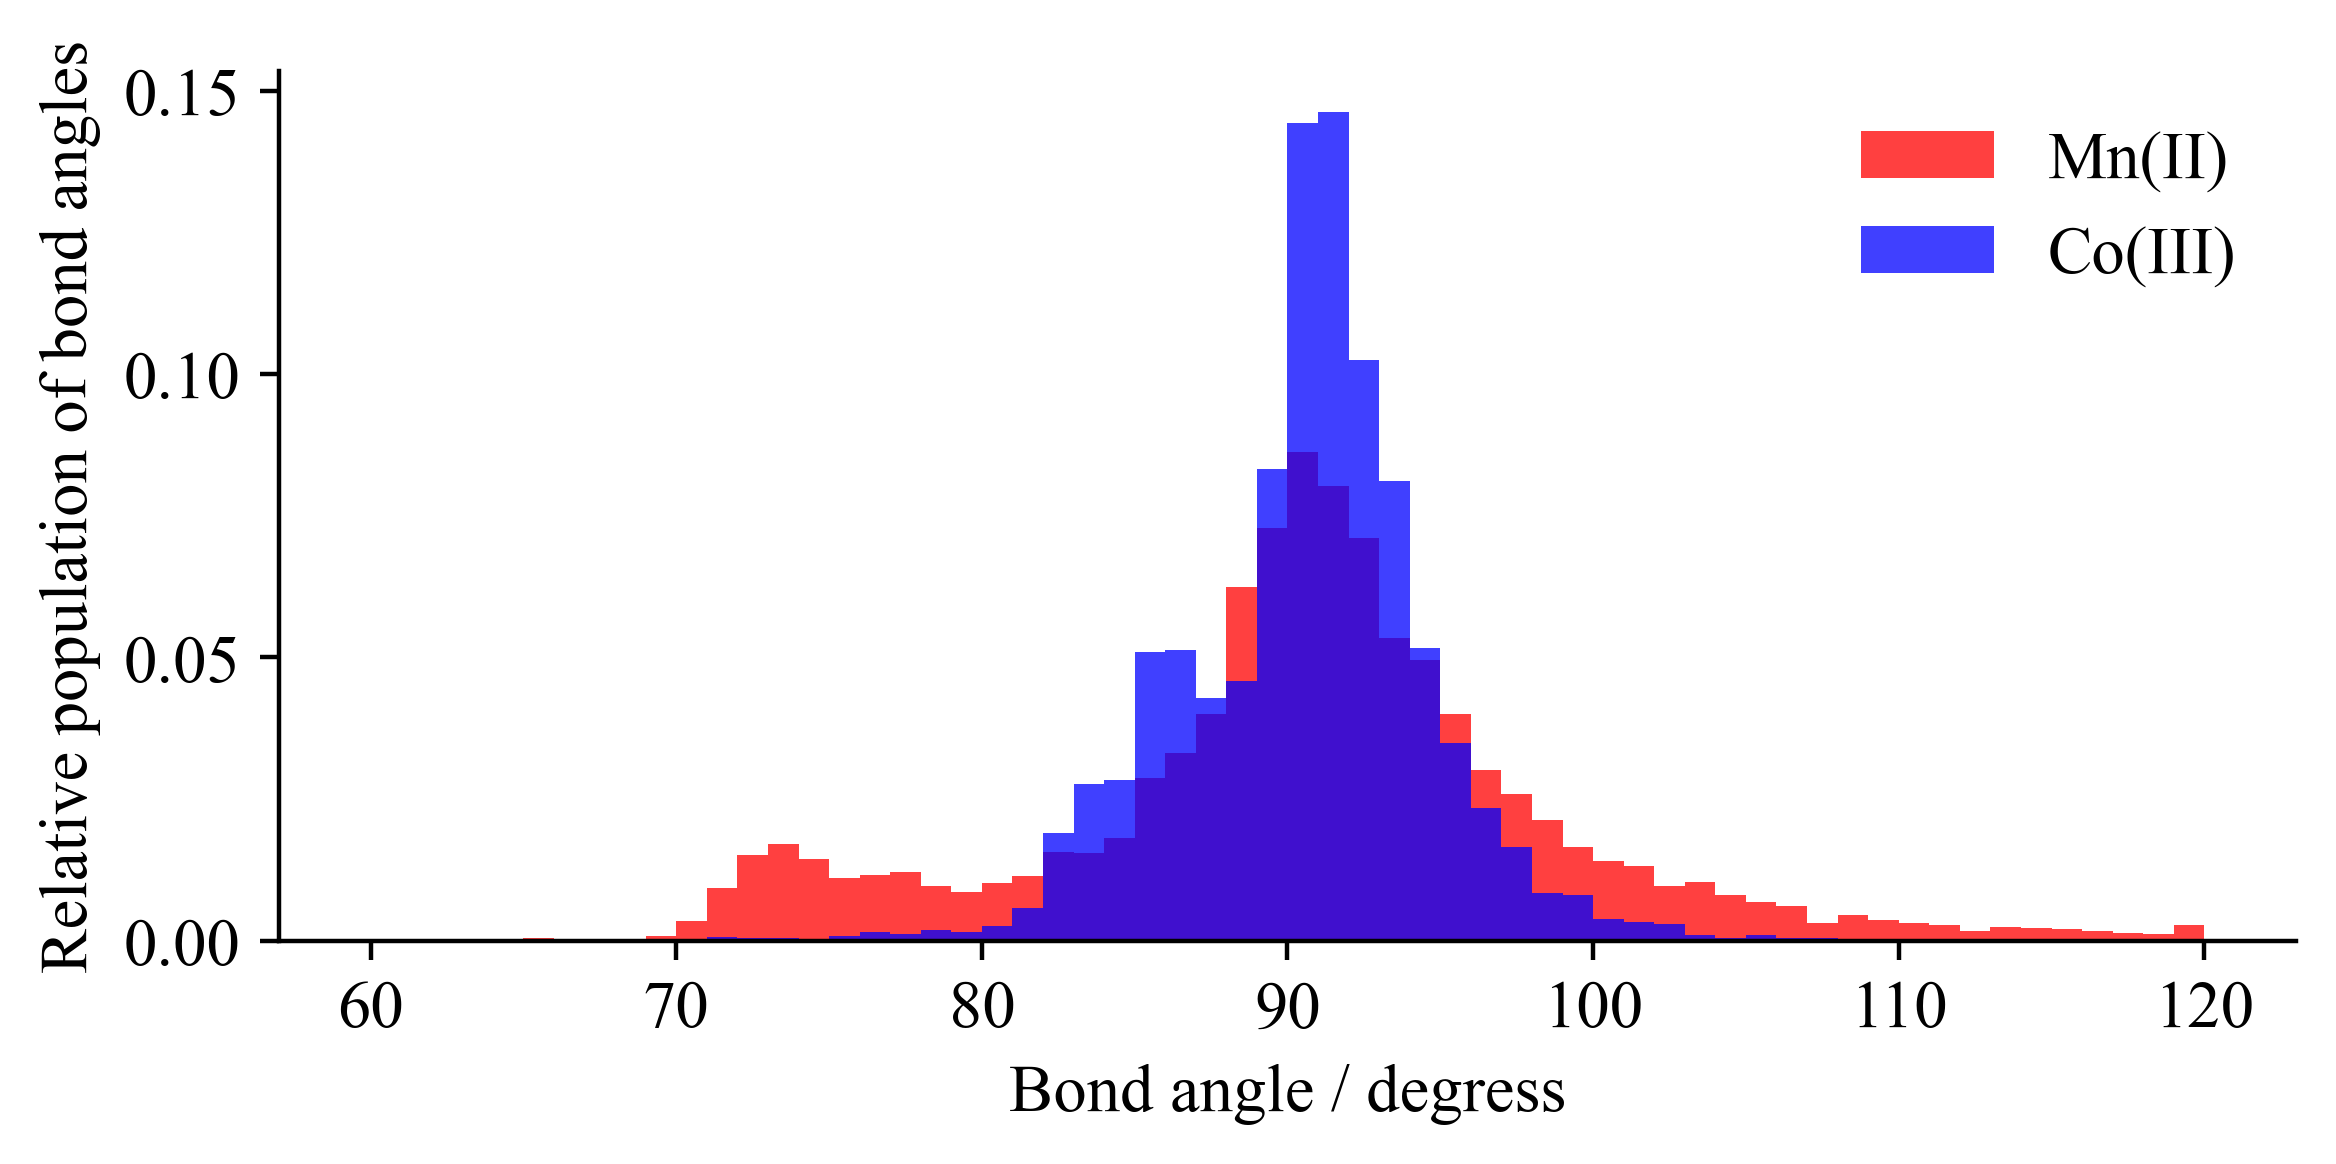

In [61]:
df3 = pd.read_csv('//ds.leeds.ac.uk/student/student49/cmsma/MnII_CoIII/6_coordinate_bond_angles.csv')
df3_Co = df3[df3['metal_centre'] == 'Co']
df3_Mn = df3[df3['metal_centre'] == 'Mn']
angle_col = list(df3.columns)
del angle_col[0:2]
Co_angles = []
Mn_angles = []
for angles in angle_col:
    Co_angles = Co_angles + list(df3_Co[angles])
    Mn_angles = Mn_angles + list(df3_Mn[angles])

Co_angles = pd.Series(Co_angles)
Co_angles = Co_angles[Co_angles <= 120]
Co_angles = Co_angles[Co_angles >= 60]
Mn_angles = pd.Series(Mn_angles)
Mn_angles = Mn_angles[Mn_angles <= 120]
Mn_angles = Mn_angles[Mn_angles >= 60]
print(Mn_angles.std())

fig, axs = plt.subplots()
# We can set the number of bins with the *bins* keyword argument.
#axs.hist(Co_angles, bins=int(max(Co_angles)-min(Co_angles)))
axs.hist(Mn_angles, weights=np.zeros_like(Mn_angles)+1/len(Mn_angles), bins=int(max(Mn_angles)-min(Mn_angles)), fc=(1, 0, 0, 0.75), label='Mn(II)')
axs.hist(Co_angles, weights=np.zeros_like(Co_angles)+1/len(Co_angles), bins=int(max(Co_angles)-min(Co_angles)), fc=(0, 0, 1, 0.75), label='Co(III)')
axs.set_xlabel('Bond angle / degress')
axs.set_ylabel('Relative population of bond angles')
axs.legend(frameon=False)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/FFPR/Mn_Co_angle_dist.png", dpi=400)
plt.show()

    Co_adjacent_atom_types  Mn_adjacent_atom_types
C                      0.0                    83.0
N                    121.0                  8662.0
O                    111.0                  7000.0
F                      0.0                     8.0
P                      0.0                     2.0
S                     26.0                   167.0
Cl                    51.0                   329.0
Se                    26.0                    13.0
Br                    75.0                     5.0
Mn                    24.0                     0.0


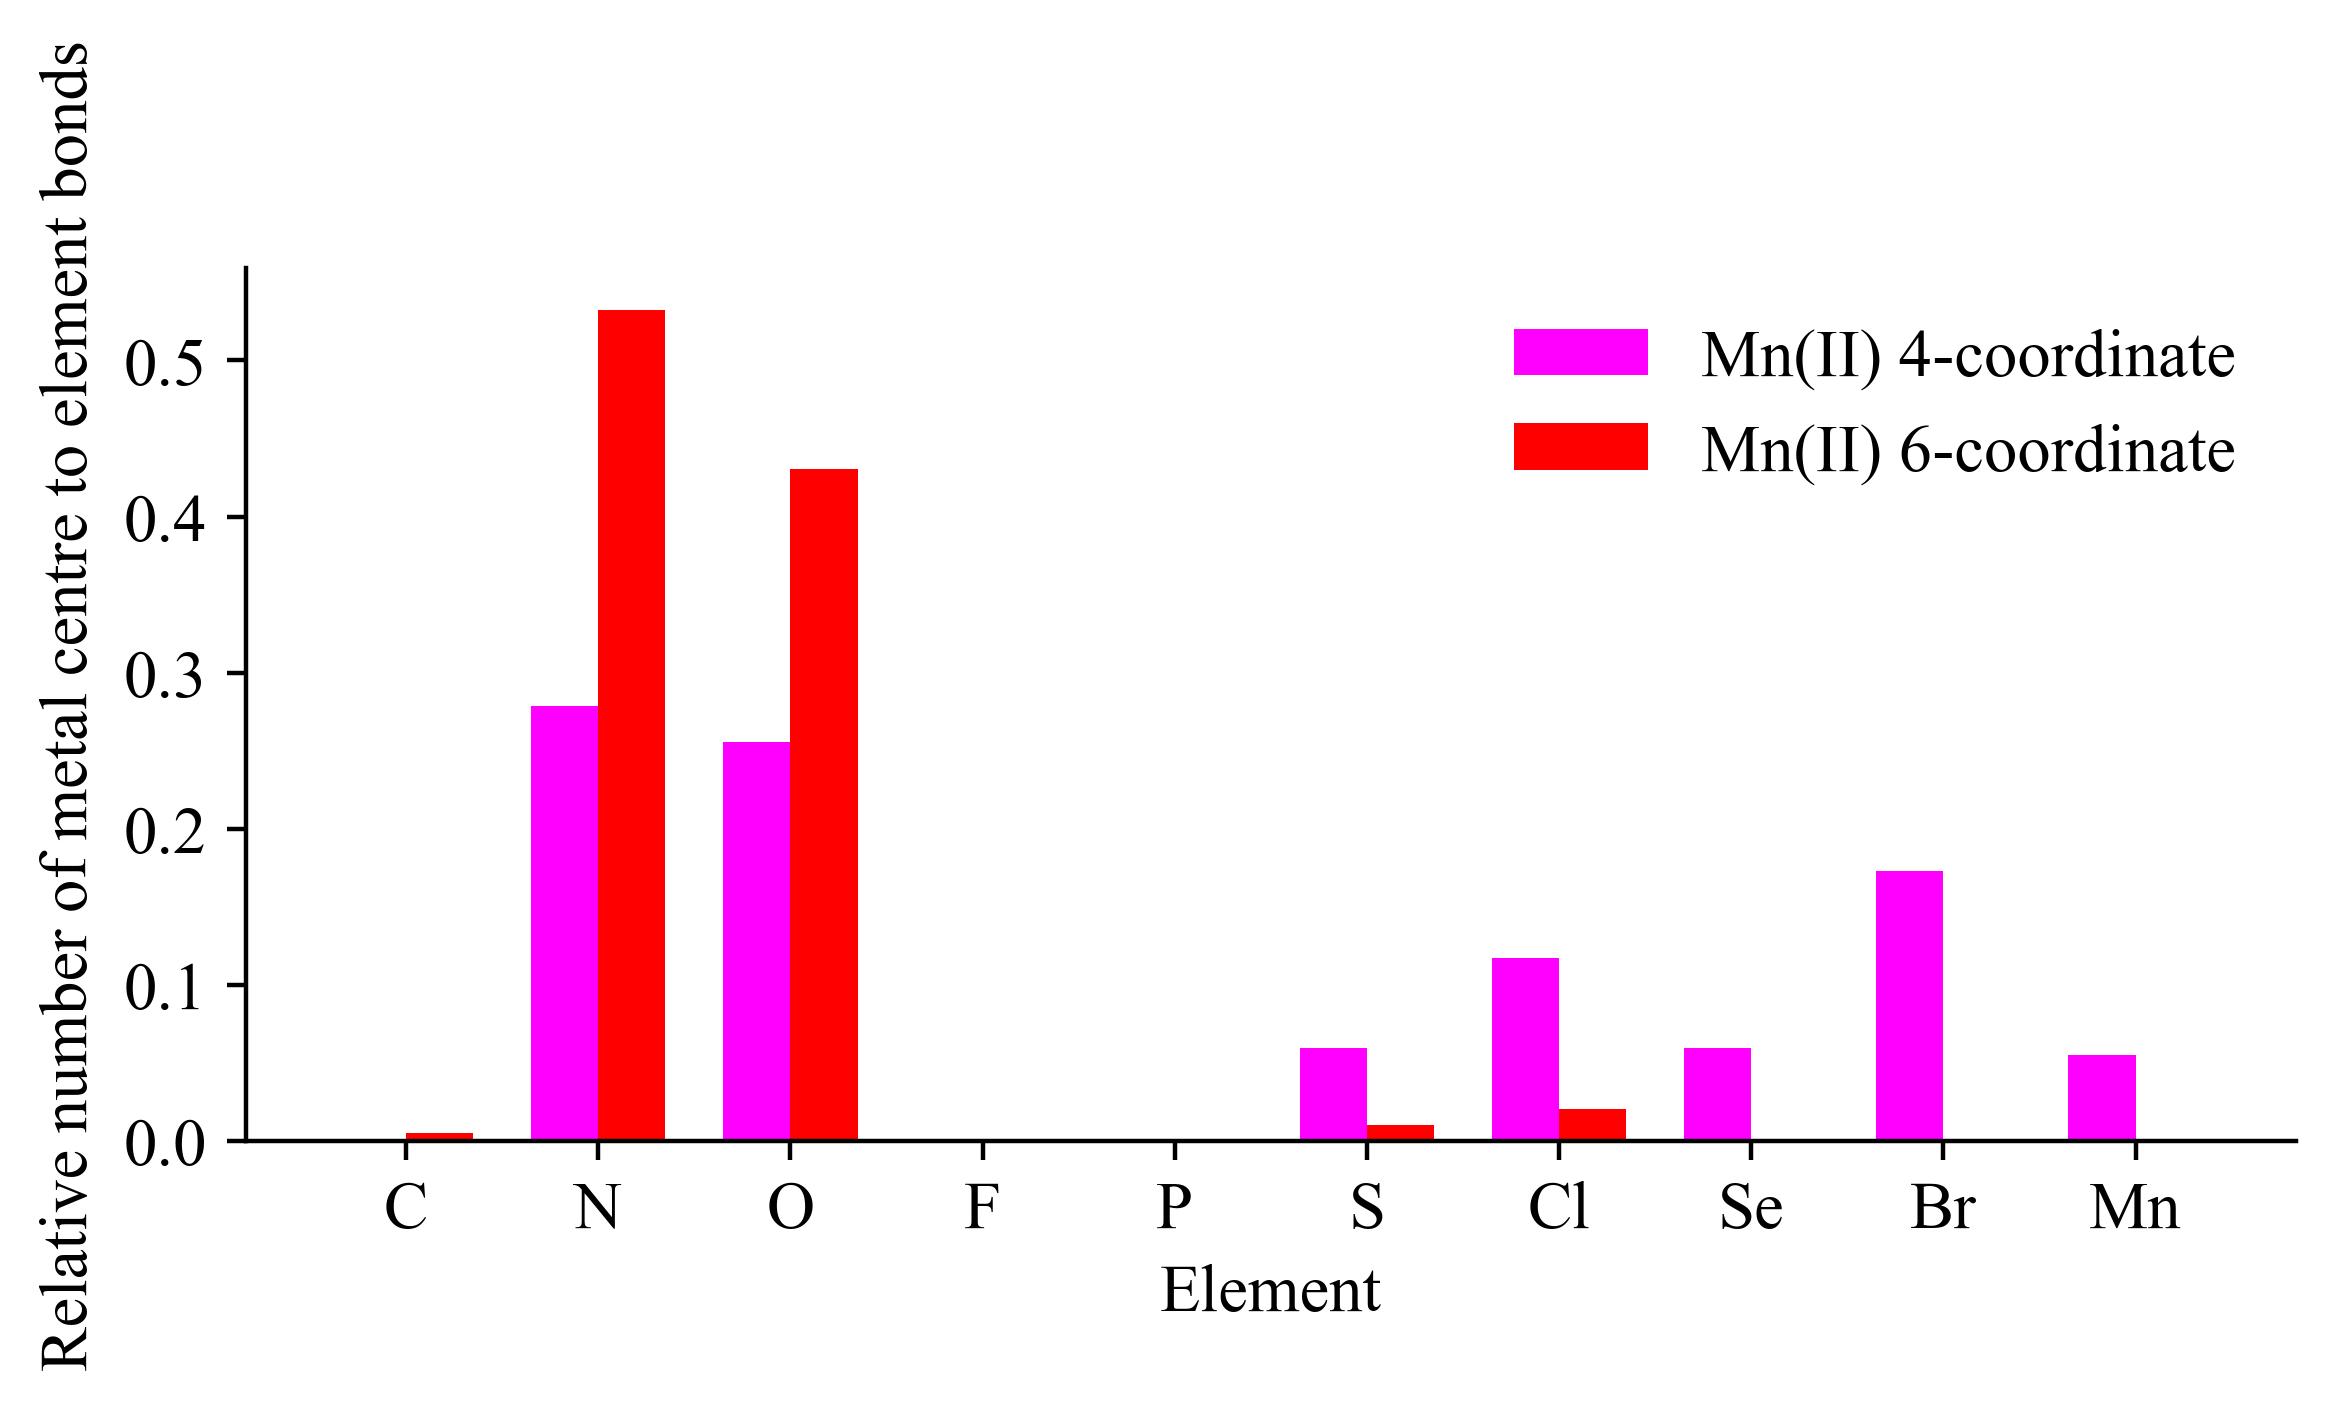

In [54]:
# Obseve differences between elements attached for 6 and 7 coordinate Mn(II) complexes
Mn_7_coordination_index_list = Mn_coordination_list.loc[lambda x : x == 4].index
Mn_7_df = Mn_df[Mn_df['ccdc_refcode_molecule_index'].isin(Mn_7_coordination_index_list)]
Mn_7_adjacent_atom_types = Mn_7_df['adjacent_atom_type'].value_counts()
Mn_7_adjacent_atom_types
elements = ['C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Se', 'Br', 'Mn']
Mn_7_adjacent_atom_types = Mn_7_adjacent_atom_types.filter(items = elements)
Mn_7_adjacent_atom_types = Mn_7_adjacent_atom_types.rename('Co_adjacent_atom_types')
Mn_adjacent_atom_types = Mn_adjacent_atom_types.filter(items = elements)
Mn_adjacent_atom_types = Mn_adjacent_atom_types.rename('Mn_adjacent_atom_types')
# the df_10 part is important as we can include all atom types, because both series don't have all atom types specified in the elements list
df_10 = pd.concat([Mn_7_adjacent_atom_types.to_frame(), Mn_adjacent_atom_types.to_frame()], axis=1)
df_10 = df_10.loc[elements]
df_10 = df_10.fillna(0)
print(df_10)
Mn_7_adjacent_atom_types = pd.Series(df_10['Co_adjacent_atom_types'])
Mn_adjacent_atom_types = pd.Series(df_10['Mn_adjacent_atom_types'])
fig, ax = plt.subplots()
ax.bar([i-width/2 for i in range(len(Mn_7_adjacent_atom_types))], [i/sum(Mn_7_adjacent_atom_types) for i in Mn_7_adjacent_atom_types], width, color='magenta', label='Mn(II) 4-coordinate')
ax.bar([i+width/2 for i in range(len(Mn_adjacent_atom_types))], [i/sum(Mn_adjacent_atom_types) for i in Mn_adjacent_atom_types], width, color='r', label='Mn(II) 6-coordinate')
ax.set_xticks(range(len(elements)))
ax.set_xticklabels(elements)
ax.set_xlabel('Element')
ax.set_ylabel('Relative number of metal centre to element bonds')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
# 2.54*2 = 5.04
# 21-5.04 = 15.96
# 15.69 cm to 6.28 inch
plt.savefig("C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/FFPR/RelPop_4_6_coor.png", dpi=400)
plt.show()

In [55]:
Mn_7_df['bond_dist'].std()

0.24995687416518358

In [56]:
df0 = pd.read_csv("C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/MnII_CoII/7_coordinate_compounds_BN/AADT_BD_AAC.csv")
df0['bond_dist'].mean()

2.3150713054187193

In [57]:
df0['bond_dist'].std()

0.10387307785277877

In [58]:
df0['bond_dist'].min()

2.0596

In [59]:
df0['bond_dist'].max()

2.7203